In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:\\Users\\Candice\\Desktop\\Python practice\\ECA_data.csv")

In [5]:
df.shape
# find the size of dataframe (rows, columns)

(18769, 24)

In [6]:
df.isnull().sum()
# check the null objects from dataset

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [7]:
df1 = df.dropna()
# remove rows which have null objects

In [8]:
df1.drop(['ID'], axis=1, inplace=True)

C:\Users\Candice\AppData\Local\Temp\ipykernel_18596\1541331866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['ID'], axis=1, inplace=True)


In [9]:
df1.describe()
# Find the statistical summary from dataset

,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,...,S5,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18720.000000,18720.000000,18720.000000,18720.000000,18720.000000,18720.000000,18720.000000,18720.000000,18720.000000,18720.000000,...,18720.000000,18720.000000,18720.000000,18720.000000,18720.000000,18720.000000,1.872000e+04,18720.000000,18720.000000,18720.000000
mean,168307.888889,9135.957564,177815.004006,0.219605,0.618056,1.788034,1.514850,35.571902,0.129113,0.111325,...,0.038942,50067.631731,48247.873771,45098.374145,41122.058440,39686.281571,6.031361e+03,5654.627938,4769.774679,5192.497382
std,129496.631582,13057.178823,143200.252119,0.413990,0.485876,0.731373,0.519602,9.559504,0.954573,0.929309,...,0.849438,71990.258769,70381.552967,66168.457834,61752.249005,59967.041352,2.292327e+04,18633.012946,15048.876656,17443.700195
min,10000.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,50000.000000,644.612500,56427.750000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,0.000000,...,0.000000,3100.750000,2869.000000,2529.500000,1962.000000,1438.750000,1.000000e+03,580.750000,284.750000,220.000000
50%,140000.000000,3974.512500,148178.000000,0.000000,1.000000,2.000000,2.000000,34.000000,0.000000,0.000000,...,0.000000,21417.000000,20441.000000,19533.000000,18371.500000,17443.000000,2.137500e+03,2000.000000,1507.000000,1550.000000
75%,240000.000000,11986.318750,257206.750000,0.000000,1.000000,2.000000,2.000000,41.000000,0.000000,0.000000,...,0.000000,65243.250000,62084.000000,57778.250000,50827.500000,49857.750000,5.002000e+03,5000.000000,4073.250000,4100.000000
max,800000.000000,130692.450000,908846.000000,1.000000,1.000000,3.000000,2.000000,199.000000,7.000000,8.000000,...,7.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,426529.000000,527143.000000


In [10]:
df1['AGE'].value_counts()[199]
# count the total number of occurrence of age "199" in the dataset

5

In [11]:
df1['AGE'].value_counts()[-1]
# count the total number of occurrence of age "-1" in the dataset

5

In [12]:
# Remove the 10 extremes/ outliers' data points for 'AGE' variable which at minimum of -1 and a maximum value of 199. 
index = df1[(df1['AGE'] >= 199) | (df1['AGE'] <= -1)].index # creates an index for all the data points where age takes these 2 values 
df1.drop(index, inplace=True)  # remove these index rows from data
df1['AGE'].describe()  # print summary statistics for the variable to ensure it has been removed 

C:\Users\Candice\AppData\Local\Temp\ipykernel_18596\105469355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index, inplace=True)  # remove these index rows from data


count    18710.000000
mean        35.538001
std          9.161682
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: AGE, dtype: float64

In [13]:
# Discretising a numeric variable into 8 bins
df1['AGE_GROUP'] = pd.cut(df1['AGE'], bins = (0,30,40,50,60,70,80,100),right=False, labels =['Age 20-29','Age 30-39','Age 40-49','Age 50-59','Age 60-69','Age 70-79','Age > 80'] )
display(df1)

C:\Users\Candice\AppData\Local\Temp\ipykernel_18596\1015223563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AGE_GROUP'] = pd.cut(df1['AGE'], bins = (0,30,40,50,60,70,80,100),right=False, labels =['Age 20-29','Age 30-39','Age 40-49','Age 50-59','Age 60-69','Age 70-79','Age > 80'] )


,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,...,B2,B3,B4,B5,R1,R2,R3,R4,R5,AGE_GROUP
0,210000,0.000,235822,1,1,1.0,2.0,30,0,0,...,0,0,0,0,0,0,0,0,0,Age 30-39
1,260000,10928.050,278481,0,0,2.0,2.0,31,0,0,...,46407,38874,31324,24031,2000,2000,2000,2000,72000,Age 30-39
2,400000,65397.850,431993,0,0,3.0,1.0,51,0,0,...,352484,338823,283288,185288,15000,14000,11500,8000,7000,Age 50-59
3,20000,3695.300,22368,0,0,2.0,1.0,58,-1,2,...,200,0,28740,1295,0,0,28740,1565,0,Age 50-59
4,180000,68.250,166900,0,1,2.0,1.0,42,0,0,...,598,2056,4300,1802,598,2056,4300,1802,3691,Age 40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,220000,33065.900,225862,0,0,3.0,1.0,39,0,0,...,208365,88004,31237,15980,20000,5003,3047,5000,1000,Age 30-39
18765,150000,294.525,149966,0,0,3.0,2.0,43,-1,-1,...,3502,8979,5190,0,3526,8998,129,0,0,Age 40-49
18766,30000,623.875,30327,1,0,2.0,2.0,37,3,2,...,2758,20878,20582,19357,0,22000,4200,2000,3100,Age 30-39
18767,80000,0.000,94607,1,0,3.0,1.0,41,-1,0,...,76304,52774,11855,48944,3409,1178,1926,52964,1804,Age 40-49


In [14]:
df1.head(2)


,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,...,B2,B3,B4,B5,R1,R2,R3,R4,R5,AGE_GROUP
0,210000,0.00,235822,1,1,1.0,2.0,30,0,0,...,0,0,0,0,0,0,0,0,0,Age 30-39
1,260000,10928.05,278481,0,0,2.0,2.0,31,0,0,...,46407,38874,31324,24031,2000,2000,2000,2000,72000,Age 30-39


In [15]:
df1.columns.values 
# list all the variables after data cleaning

array(['LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION',
       'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5', 'AGE_GROUP'],
      dtype=object)

In [16]:
df1.index.values # list the index after data cleaning

array([    0,     1,     2, ..., 18766, 18767, 18768], dtype=int64)

In [17]:
print(type(df1.columns))
print(type(df1.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.numeric.Int64Index'>


In [18]:
df1.columns.tolist()
df1.index.tolist()
print (type(df1.columns.tolist()))
print (type(df1.index.tolist()))

<class 'list'>
<class 'list'>


i. Stack Bar Chart : Customer's Gender by Age Group

In [19]:
df2 = df1.groupby(['AGE_GROUP', 'GENDER'])['GENDER'].count().unstack().fillna(0).astype(int)

In [20]:
df1.shape
# find the size of dataframe (rows, columns)

(18710, 24)

In [21]:
print(df2)

GENDER        0     1
AGE_GROUP            
Age 20-29  1917  4007
Age 30-39  2776  4267
Age 40-49  1686  2393
Age 50-59   661   804
Age 60-69    96    88
Age 70-79     7     7
Age > 80      1     0


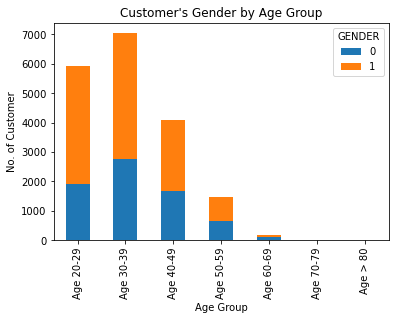

<Figure size 5760x4320 with 0 Axes>

In [22]:
## To plot "Customer's Gender by Age"
df2.plot(kind='bar', stacked=True)
plt.title("Customer's Gender by Age Group")
plt.xlabel("Age Group")
plt.ylabel("No. of Customer")
plt.figure(figsize=(80,60))
plt.rc('xtick', labelsize= 7.5)
plt.rc('ytick', labelsize= 8) 

ii. Bar Chart : Average Customer Income by Age Group

In [23]:
df3 = df1.groupby(['AGE_GROUP'])['INCOME'].sum(numeric_only=False)

In [24]:
search_product_df1 = df1.groupby(['AGE_GROUP'])

In [25]:
def findavg(itemname):
    selected_items = search_product_df1.get_group(itemname)
    AGE_GROUP_count=selected_items['INCOME'].count()
    AGE_GROUP_total_INC=selected_items['INCOME'].sum()
    AGE_GROUP_avg=round(AGE_GROUP_total_INC/AGE_GROUP_count,2)
    return AGE_GROUP_avg

In [26]:
data = {'Age 20-29':(findavg('Age 20-29')),\
         'Age 30-39':(findavg('Age 30-39')),'Age 40-49':(findavg('Age 40-49')),'Age 50-59':(findavg('Age 50-59')),\
        'Age 60-69':(findavg('Age 60-69')), 'Age 70-79':(findavg('Age 70-79')), 'Age > 80':(findavg('Age > 80'))}

In [27]:
AGE_GROUP = list(data.keys())

In [28]:
values = list(data.values())

In [29]:
print(pd.DataFrame(data={'AGE_GROUP':AGE_GROUP, 'Average Income': values}))

   AGE_GROUP  Average Income
0  Age 20-29       132096.77
1  Age 30-39       208920.82
2  Age 40-49       189883.10
3  Age 50-59       175779.92
4  Age 60-69       202302.01
5  Age 70-79       295117.64
6   Age > 80        82953.00


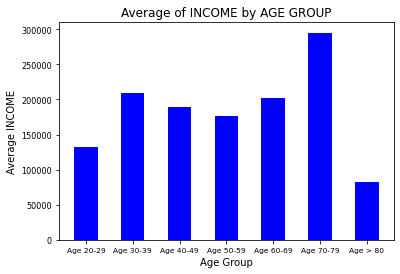

<Figure size 7200x4320 with 0 Axes>

In [30]:
# Plot average of customer's income by age group 
plt.bar(AGE_GROUP, values, color = 'blue', width = 0.5)
plt.xlabel("Age Group")
plt.ylabel("Average INCOME")
plt.title("Average of INCOME by AGE GROUP")
plt.figure(figsize=(100,60))
plt.rc('xtick', labelsize= 8)
plt.rc('ytick', labelsize= 8) 


iii.
Pie chart : Customer's Education

In [31]:
df1.EDUCATION.count()

18710

In [32]:
df4 =df1['EDUCATION'].value_counts(sort=False) 
df4

1.0    6404
2.0    8865
3.0    3107
0.0     334
Name: EDUCATION, dtype: int64

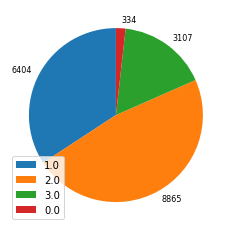

In [33]:
# Plot pie chart for customer's education level
values = df4
labels = df1['EDUCATION'].unique().tolist()
plt.pie(df4, labels=values, startangle =90)
plt.legend(labels, loc = 3)
plt.show()

iv. Stack bar chart: Customer Rating by Gender

In [34]:
df5 = df1.groupby(['RATING', 'GENDER'])['GENDER'].count().unstack().fillna(0)
print(df5)

GENDER     0     1
RATING            
0       5407  9192
1       1737  2374


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

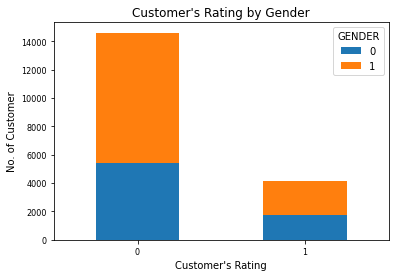

In [35]:
# Plot customer's rating by gender
#Gender: 0:Male, 1:Female
#Rating: 0:Good, 1:Bad

df5.plot(kind='bar', stacked=True)
plt.title("Customer's Rating by Gender")
plt.xlabel("Customer\'s Rating")
plt.ylabel("No. of Customer")
plt.xticks(rotation=0, ha='center')

v. Bar Chart: Average Balance by Customer's Education

In [43]:
df6 = df1.groupby(['EDUCATION'])['BALANCE'].sum(numeric_only=False)

In [44]:
search_product_df1 = df1.groupby(['EDUCATION'])

In [45]:
# Find the average of balance per Education
def findavg(itemname):
    selected_items = search_product_df1.get_group(itemname)
    EDUCATION_count=selected_items['BALANCE'].count()
    EDUCATION_total_BAL=selected_items['BALANCE'].sum()
    EDUCATION_avg=round(EDUCATION_total_BAL/EDUCATION_count,2)
    return EDUCATION_avg

In [46]:
EDUCATION = list(data.keys())

In [47]:
# Assign average value to dictionaries
data = {'0':(findavg(0)),'1':(findavg(1)),'2':(findavg(2)),'3':(findavg(3))}
print(data)

{'0': 12756.65, '1': 8663.8, '2': 9596.87, '3': 8415.06}


In [48]:
values = list(data.values())

In [49]:
print(pd.DataFrame(data={'Education Level': EDUCATION, 'Average Income': values}))

  Education Level  Average Income
0               0        12756.65
1               1         8663.80
2               2         9596.87
3               3         8415.06


Text(0.5, 1.0, "Average Balance by Customer's Education")

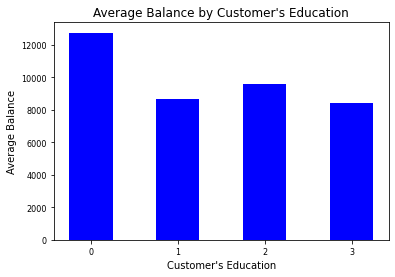

In [50]:
# Plot bar char for the average balance by customer's education level
plt.bar(EDUCATION, values, color = 'blue', width = 0.5)
plt.xlabel('Customer\'s Education')
plt.ylabel('Average Balance')
plt.title('Average Balance by Customer\'s Education')